Sprawdźmy, czy pewien trening na zapamiętywanie słówek pomaga. Te same osoby uczyły się pewnych  słówek bez treningu, a potem miały trening i znów uczyły się słówek.

Dane podane są w rozróżnieniu na wiek: dzieci do 13 roku i młodzież powyżej 13 lat

Dwie zależne próby dla dzieci

Dwie zależne próby dla młodzieży


Zadanie należy rozwiązać samymi testami !

ROZWIĄZANIE DLA DZIECI 

1. Czy rozkłady są normalne (W OBU KOLUMNACH, proszę sprawdzić tylko testem), na poziomie istotności 0.05

Ho:  Rozkład normalny dobrze opisuje wyniki testu przed treningiem

H1: wyniki testu przed treningiem nie podlegają rozkładowi normalnemu

Ho(po treningu dla dzieci): wyniki testu po treningu podlegają rozkłądowi normalnemu

H1(po treningu dla dzieci): wyniki testu po treningu nie podlegają rozkłądowi normalnemu


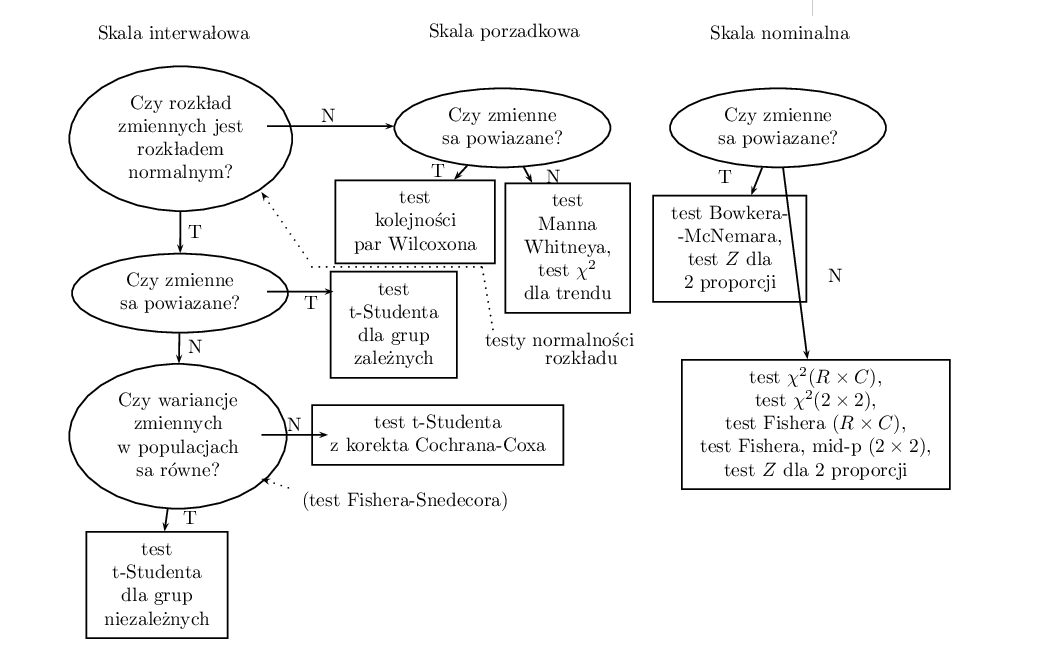

In [22]:
import numpy as np
wyniki_dla_dzieci= [[65,77],[61,74],[81,82],[88,90],[69,77],[ 89,93],[ 55,64],[ 84,84],[ 56,75],[ 84,86],[ 71,72],[ 81,88],[ 84,88],[ 81,80],[78,66],[67,74],[96,87],[66,69],[73,75],[75,68],[59,64],[71,71],[69,68],[53,75],[79,83],[ 66,80],[ 63,67],[ 85,78],[  87,84],[  88,91],[ 80,76],[ 71,73],[ 65,67],[84,89],[71,67],[75,75],[81,72],[79,69],[64,71],[65,72],[84,72],[77,81],[70,77],[75,71],[84,77],[75,77],[73,67],[92,75],[90,83],[79,74],[80,74],[71,81],[73,67],[71,69],[58,63],[79,73],[73,77],[64,79],[77,86],[82,73],[81,84],[59,71],[54,67],[82,84],[57,71],[79,98],[79,98],[53,68],[74,77],[82,84],[63,70],[64,69],[73,81],[69,81],[87,97],[68,66],[81,76],[73,75],[83,83],[73,77],[80,78],[73,77],[73,74],[71,72],[66,68],[78,75],[64,78],[74,71],[68,74],[67,70],[75,88],[75,80],[80,74],[85,76],[74,71],[76,79],[80,62],[77,77],[93,80],[70,71],[86,72],[80,79],[81,76],[83,77],[68,71],[60,64],[85,74],[64,63],[74,68],[82,78],[40,69],[77,73],[66,79],[35,76],[75,84],[81,89],[60,63],[60,69],[73,79],[72,83]]
#est_normalnosci_Wyniki_dzieci=normalitytest(wyniki_dla_dzieci(:,2)');
wyniki_dla_dzieci= np.array(wyniki_dla_dzieci)
wyniki_dla_dzieci_przed=wyniki_dla_dzieci[:,0]
wyniki_dla_dzieci_po=wyniki_dla_dzieci[:,1]

In [23]:
data= wyniki_dla_dzieci_po# przypisz zmienną

# Testy normalności rozkładu
from scipy.stats import shapiro, normaltest, chisquare, jarque_bera, kstest
from statsmodels.stats.diagnostic import lilliefors

stat, p =shapiro(data)
print(['Shapiro-Wilk Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')

stat, p =normaltest(data)
print(['Shapiro-Wilk Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')

stat, p =chisquare(data)
print(['Shapiro-Wilk Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')

stat, p =jarque_bera(data)
print(['Shapiro-Wilk Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')

stat, p =kstest(data, 'norm')
print(['Shapiro-Wilk Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')

['Shapiro-Wilk Test: stat=0.968, p=0.006015']
not normal

['Shapiro-Wilk Test: stat=8.424, p=0.014815']
not normal

['Shapiro-Wilk Test: stat=91.692, p=0.970150']
normal

['Shapiro-Wilk Test: stat=8.280, p=0.015924']
not normal

['Shapiro-Wilk Test: stat=1.000, p=0.000000']
not normal



Czy rozkłady są normalne?

odpowiedź: na zadanym poziomie istotności powinniśmy odzrucić hipotezę zerową i przyjąc hipotezę alternatywną. Zarówno wyniki przed jak i po treningu nie podleają rozkładowi normalnemu.

2. Czy można skorzystać z testu Wilcoxon'a?

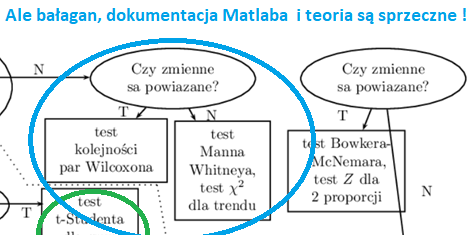

Biblioteka Scipy:

scipy.stats.wilcoxon(x, y=None, zero_method='wilcox', correction=False, alternative='two-sided', mode='auto', *, axis=0, nan_policy='propagate')

Mając n niezależnych próbek (xi, yi) z rozkładu dwuwymiarowego (tj. sparowanych próbek), oblicza różnice di = xi - yi. Jednym z założeń testu jest to, że różnice są symetryczne. 
Test jednostronny ma hipotezę zerową, że mediana różnic wynosi zero w porównaniu z alternatywą, że jest różna od zera. Test jednostronny ma hipotezę zerową, że mediana jest dodatnia w porównaniu z alternatywą, że jest ujemna (alternatywa == „mniej”) lub odwrotnie (alternatywa == „większa”).


O ile test t-Studenta sprawdza hipotezę zerową o równości średnich arytmetycznych w odpowiadających im populacjach, test Wilcoxona weryfikuje równość median. 

Ho: mediany są sobie równe
H1: mediany nie są sobie równe

In [24]:
#kod
#STATS=scipy.stats.wilcoxon
from scipy import stats
x = wyniki_dla_dzieci_przed
y = wyniki_dla_dzieci_po
print(np.median(x))
print(np.median(y))
w, p = stats.wilcoxon(x, y, zero_method='wilcox', nan_policy='propagate')
print(w,p)

74.0
75.0
2372.0 0.007149938046465604


3. Czy to oznacza, że zastosowany  trening na zapamiętywanie słówek jest dla dzieci skuteczny ?

odpowiedź: na poziomie istotnosci 0,05 powinniśmy odrzucić hipotezę zerową i przyjąć hipotezę alternatywną

Proszę teraz przeprowadzić analogiczną analizę dla młodzieży uwzględniającą wszytkie punkty 1-3 zaczynając od rozkładów normalności.

In [25]:
mlodziez=[[75,69],[66,68],[74,79],[88,79],[69,76],[77,80],[50,63],[77,78],[87,79],[92,85],[81,79],[79,83],[74,80],[83,79],[84,75],[76,72],[78,82],[68,70],[76,74],[85,79],[60,67],[78,75],[60,66],[69,77],[90,87],[69,76]]
wyniki_mlodziez =np.array(mlodziez)
mlodziez_przed = wyniki_mlodziez[:,0]
mlodziez_po = wyniki_mlodziez[:,1]

data=mlodziez_przed# przypisz zmienną

# Testy normalności rozkładu
from scipy.stats import shapiro, normaltest, chisquare, jarque_bera, kstest
from statsmodels.stats.diagnostic import lilliefors
print('mlodziez przed:')
stat, p =shapiro(data)
print(['Shapiro-Wilk Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')

stat, p =normaltest(data)
print(['normaltest Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')

stat, p =chisquare(data)
print(['chisquare Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')

stat, p =jarque_bera(data)
print(['jarque Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')

stat, p =kstest(data, 'norm')
print(['kstest Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')

data=mlodziez_po# przypisz zmienną
print('mlodzez po:')

stat, p =shapiro(data)
print(['Shapiro-Wilk Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')

stat, p =normaltest(data)
print(['normaltest Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')

stat, p =chisquare(data)
print(['chisquare Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')

stat, p =jarque_bera(data)
print(['jarque Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')

stat, p =kstest(data, 'norm')
print(['kstest Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')

mlodziez przed:
['Shapiro-Wilk Test: stat=0.967, p=0.548950']
normal

['normaltest Test: stat=2.405, p=0.300491']
normal

['chisquare Test: stat=32.528, p=0.143303']
normal

['jarque Test: stat=1.424, p=0.490670']
normal

['kstest Test: stat=1.000, p=0.000000']
not normal

mlodzez po:
['Shapiro-Wilk Test: stat=0.958, p=0.349757']
normal

['normaltest Test: stat=1.089, p=0.580119']
normal

['chisquare Test: stat=11.822, p=0.987940']
normal

['jarque Test: stat=1.003, p=0.605472']
normal

['kstest Test: stat=1.000, p=0.000000']
not normal



przed treningiem:
H0: wyniki podlegają rozkładowi normalnemu
H1: wyniki nie podlegają rozkładowi normalnemu
wniosek: na poziomie istotności 0,05 nie mamy podstaw do odrzucenia hipotezy zerowej
po treningu:
H0: wyniki podlegają rozkładowi normalnemu
H1: wyniki nie podlegają rozkładowi normalnemu
wniosek: na poziomie istotności 0,05 nie mamy podstaw do odrzucenia hipotezy zerowej

Czy trening jest skuteczny w przypadku mlodziezy?
Odp:

H0: wariancje przed i po są równe
H1: wariancje przed i po są różne

In [26]:
from scipy import stats
# TO WAŻNE, KTÓRA WARIANCJA JEST WIĘKSZA  
x=mlodziez_przed
y=mlodziez_po
print(np.var(x, ddof=1))
print(np.var(y, ddof=1))

f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
dfn = x.size-1 #define degrees of freedom numerator 
dfd = y.size-1 #define degrees of freedom denominator 
p_value = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 

print('Test F sprawdza czy dwie wariancje populacji są równe: f=%.3f, p_value=%3f' %(f,p_value))


98.33384615384615
35.958461538461535
Test F sprawdza czy dwie wariancje populacji są równe: f=2.735, p_value=0.007328


Na poziomie istotosci 0,05 powinniśmy odrzucić hipotezę, że wariancje są równe i przyjąć hipotezę alternatywną, że wariancje są różne

test, czy trening wplynał an wynik testu
H0: średnie są sobie równe
H1: średnie nie są sobie równe

In [28]:
import scipy.stats as stats

a=mlodziez_przed
b=mlodziez_po
print(np.mean(a))
print(np.mean(b))
#wykonanie testu t dla dwóch prób z równymi wariancjami, jeśli nie sa równe należy to zmienić
stat, p =stats.ttest_ind(a, b, equal_var=False)
print(stat, p)

75.57692307692308
76.03846153846153
-0.20308086456626764 0.840073243037681


Odpowiedź:
Na poziomie istotności 0,05 nie mamy podstaw do odrzucenia hipotezy zerowej, że średnie przed i po to treningu są takie same, więc trening nie jest skuteczny w przypadku młodzieży.